___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## André Neustein

## Carla Gaieski

## Ester Quintino

___

Definir o preço de uma casa, de acordo com suas características.

___

## INTRODUÇÃO

 O projeto 3 visa conduzir uma análise de dados de um determinado tema, desde que para o mesmo haja a  realização de quatro modelos preditivos para estimar uma variável-alvo a partir de outras variáveis explicativas.
       Assim, para a execução do projeto, primeiramente , uma base de dados foi escolhida no site Kraggle, sendo ela, a  "House Sales in King County, USA", que trata dos preços das casas no distrito de Washington, variando de acordo com suas características. Assim, o dataframe como um todo, contém informações como: o preço da residência; quantidade de quartos, de andares,de  metros quadrados de construção e  de metros total de terreno; além do número de  banheiros por quarto; ano de construção; condição do estabelecimento; CEP;  ano de construção;  número de visitas já feitas; se há vista para lago/mar, entre outros.
       A partir de todas as informações disponíveis, foi possível determinar o objetivo central do projeto, que é a previsão do preço de uma casa em King country de acordo com as suas características. Encontrando artigos e notícias sobre o assunto, percebemos que o preço de residências no Estado, principalmente em metrópoles,como Seattle, sofreu altas mudanças nos anos anteriores, sendo 2017, o ano taxado como o mais caro na história.

   https://www.seattletimes.com/business/real-estate/king-county-housing-market-kicks-off-2018-even-hotter-than-before-as-seattle-breaks-price-record/
   https://www.seattletimes.com/business/real-estate/as-home-prices-hit-new-highs-cost-of-living-overtakes-traffic-as-worst-part-of-living-in-seattle-area/
   https://www.seattletimes.com/business/real-estate/million-dollar-home-sales-surge-in-king-county-creeping-into-cheaper-neighborhoods/
   https://pdfs.semanticscholar.org/fd8d/467b219e71ad68f1334a1d9614be16ba6ab0.pdf
   https://www.sciencedirect.com/science/article/pii/S0094119005000537
   http://journals.sagepub.com/doi/pdf/10.1080/0042098042000214806

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

    A base de dados coletada contêm as informações: 
        Id - notação da casa
        *date - data de venda da casa
        *price - preço
        *bedrooms - número de quartos por casa
        *bathrooms - número de banheiros por quartos
        *sqft_living - pé quadrado da casa
        *sqft_lot - pé quadrado do lote
        *floors - número total de andares
        *waterfront - vista para água (lago, rios, mar)
        view - foi vista
        *condition - quão boa está a condição, em geral
        *grade - nota geral dada, com base no sistema de notas de King Country
        sqft_above - pé quadrado sem porão
        sqft_basement - pé quadrado com o porão
        *yr_built - ano de construção
        *yr_renovated - ano de renovação
        *zipcode - CEP
        lat - latitude
        long - longitude
        sqft_living15 - área da sala em 2015
        sqft_lot15 - área do lote em 2015
        
     Assim, o dataframe será filtrado para que permaneçam somentes as variáves que nos interessa para a análise, que são as indicadas com "*"
        

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Ester Quintino\Desktop\Ciência dos Dados\Projeto 3


### BASE DE DADOS

In [3]:
#leitura da base de dados
casa = pd.read_csv('housesalesprediction.zip', compression='zip', header=0, sep=',', quotechar='"')
casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#modificando o dataframe para conter as variaveis que nos interessam e romovendo os "Nan" existentes
dados = casa.loc [:, ["date","price", "bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","condition","grade","yr_built","yr_renovated","zipcode"]]
dados.dropna().head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,0,98178
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,1991,98125
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,0,98028
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,0,98136
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,0,98074


In [5]:
#criando categorias
dados['waterfront']=dados['waterfront'].astype('category')
dados['waterfront'].cat.categories = (['Não','Sim'])
dados.head()

dados['condition']= dados['condition'].astype('category')
dados['condition'].cat.categories = ('Ruim','Satisfatório', 'Ok', 'Bom', 'Excelente')

def grading(dados):
    x=dados['grade']
    if x<=2: return 1
    elif x<=4: return 2
    elif x<=6: return 3
    elif x==7: return 4
    elif x<=9: return 5
    elif x<=11: return 6
    elif x<=13: return 7
    return 8

grade=dados.apply(grading,axis=1)
dados['grade']=grade
dados.grade=dados.grade.astype('category')
dados.grade.cat.categories=(['Péssimo','Muito Ruim','Ruim','Ok','Bom','Muito Bom', 'Excelente'])

#df['grade']= df['grade'].astype('grade')
#df['grade'].cat.categories = ('Péssimo','Muito Ruim', 'Ruim', 'OK', 'Bom', 'Muito Bom', 'Incrível', 'Excelente')

In [6]:
#descrição do preço das casas
dados['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### ANÁLISE DESCRITIVA

Porcentagem de casas de acordo com sua condição:

In [7]:
dados['condition'].value_counts(True)*100

Ok              64.919262
Bom             26.275852
Excelente        7.870263
Satisfatório     0.795817
Ruim             0.138805
Name: condition, dtype: float64

Porcentagem quartos:

In [8]:
dados['bedrooms'].value_counts(True)*100

3     45.454125
4     31.841947
2     12.770092
5      7.407579
6      1.258502
1      0.920742
7      0.175820
8      0.060149
0      0.060149
9      0.027761
10     0.013881
11     0.004627
33     0.004627
Name: bedrooms, dtype: float64

Porcentagem casas com vista para água:

In [9]:
dados['waterfront'].value_counts(True)*100

Não    99.245824
Sim     0.754176
Name: waterfront, dtype: float64

Porcentagem de nota atrubiída às casas:

In [10]:
dados['grade'].value_counts(True)*100

Ok            41.553695
Bom           40.174895
Ruim          10.549206
Muito Bom      7.092953
Excelente      0.476565
Muito Ruim     0.148059
Péssimo        0.004627
Name: grade, dtype: float64

"grade" varia de 1 a 13, e tem media de 7,65

Porcentagem das casas de acordo com a quantidade de andares: aqui, perce-be que há valores não inteiros, que podem indicar....

In [21]:
dados['floors'].value_counts(True)*100

1.0    49.414704
2.0    38.129829
1.5     8.837274
3.0     2.836256
2.5     0.744922
3.5     0.037015
Name: floors, dtype: float64

In [22]:
dados['yr_renovated'].value_counts(True)*100

0       95.771064
2014     0.421043
2013     0.171193
2003     0.166566
2000     0.161940
2007     0.161940
2005     0.161940
2004     0.120298
1990     0.115671
2006     0.111044
2009     0.101791
1989     0.101791
2002     0.101791
1991     0.092537
2001     0.087910
1998     0.087910
1994     0.087910
1993     0.087910
1987     0.083283
1983     0.083283
1984     0.083283
2010     0.083283
2008     0.083283
1986     0.078656
1985     0.078656
1999     0.078656
1992     0.078656
2015     0.074030
1995     0.074030
1996     0.069403
          ...    
1975     0.027761
1978     0.027761
1981     0.023134
1964     0.023134
1965     0.023134
1958     0.023134
1973     0.023134
1969     0.018507
1972     0.018507
1960     0.018507
1963     0.018507
1956     0.013881
1945     0.013881
1974     0.013881
1953     0.013881
1955     0.013881
1976     0.013881
1957     0.013881
1962     0.009254
1950     0.009254
1967     0.009254
1946     0.009254
1971     0.009254
1940     0.009254
1954     0

95% das casas construídas não foram renovadas em nenhum ano

# Relação entre a Condição da Casa e o Ano de Construção

In [14]:
#crosstab entre a condição da casa e ano de cosnrução
ct1 = pd.crosstab(dados['condition'], dados['yr_built'],normalize = True)
ct1


yr_built,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
condition,,,,,,,,,,,,,,,,,,,,,
Ruim,0.000093,0.000046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000046,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Satisfatório,0.000093,0.000000,0.000000,0.000046,0.000000,0.000046,0.000278,0.000000,0.000046,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Ok,0.002036,0.000601,0.000694,0.001296,0.000972,0.001758,0.001573,0.001527,0.001619,0.001666,...,0.020821,0.019294,0.016934,0.010595,0.006616,0.006015,0.007866,0.0093,0.025864,0.001758
Bom,0.001203,0.000416,0.000324,0.000463,0.000555,0.000555,0.001666,0.000972,0.001342,0.001758,...,0.000185,0.000000,0.000046,0.000046,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Excelente,0.000601,0.000278,0.000231,0.000324,0.000555,0.001064,0.000740,0.000509,0.000925,0.000925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000


As condições das casas variam de 1 a 5, sendo 1 a pior condição e 5, a melhor. Analisando o dataframe, percebe-se, que a maioria das casas, ao longo dos anos, permaneceram com uma nota 3 (moda) de condição. 
Ademais, é possível constatar que somente as casas construídas nos anos de 1900 a 1909, possuíram mais divergências na nota de condição. 
Em relação ao número de casas, no século XXI, a quantidade era muito menor em relação aos dias hodiernos, que apesar de ser caracterizado por seus aumentos, houve uma recaída marcante em 2015. Tal recaída, se deve pela alta quantidade de casas à venda, e pouca compra. Assim, havia baixa demanda e muita oferta.

# Relação entre a Condição da Casa e a vista para a água

In [15]:
#crosstab entre a condição da codição e vista para água
ct2 = pd.crosstab(dados['condition'], dados['waterfront'])
ct2

waterfront,Não,Sim
condition,,
Ruim,29,1
Satisfatório,171,1
Ok,13940,91
Bom,5629,50
Excelente,1681,20


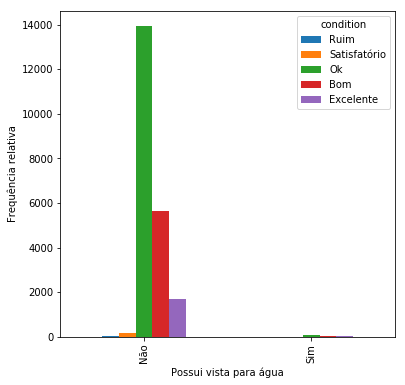

In [16]:
ct2.T.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Frequência relativa')
plt.xlabel('Possui vista para água')
plt.show()

É possível perceber que é pequeno o número de residências com vista para a água. As que possui, estão inseridas na classificação "ok","bom" ou "excelente".

# Relação entre a Condição da Casa e a nota geral

In [17]:
#crosstab entre a condição da casa e a nota geral
ct3 = pd.crosstab(dados['condition'], dados['grade'])
ct3

grade,Péssimo,Muito Ruim,Ruim,Ok,Bom,Muito Bom,Excelente
condition,,,,,,,
Ruim,1,1,20,6,2,0,0
Satisfatório,0,6,74,75,15,2,0
Ok,0,14,1135,5234,6310,1253,85
Bom,0,10,769,2833,1840,212,15
Excelente,0,1,282,833,516,66,3


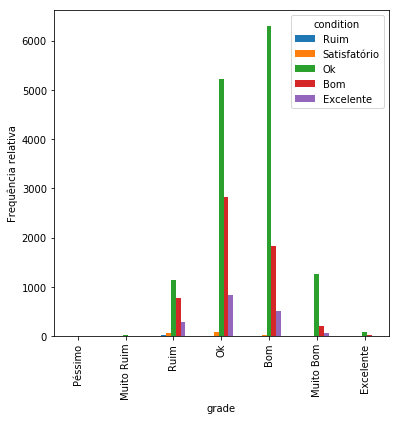

In [18]:
ct3.T.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Frequência relativa')
plt.xlabel('grade')
plt.show()

Nessa localidade , a maioria das casas podem ser designadas como "ok" ou "boas". São poucas as casas caracterizadas como "péssimas" e/ou "muuito ruins".

# Relação entre a Condição da Casa e a quantidade de quartos

In [27]:
#crosstab entre a condição da casa e a nota geral
ct4 = pd.crosstab(dados['condition'], dados['bedrooms'])
ct4


bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
condition,,,,,,,,,,,,,
Ruim,1,4,12,8,4,0,1,0,0,0,0,0,0
Satisfatório,1,11,51,69,36,1,3,0,0,0,0,0,0
Ok,10,124,1779,6308,4580,1031,158,25,8,6,1,1,0
Bom,1,48,718,2711,1682,418,87,9,3,0,2,0,0
Excelente,0,12,200,728,580,151,23,4,2,0,0,0,1


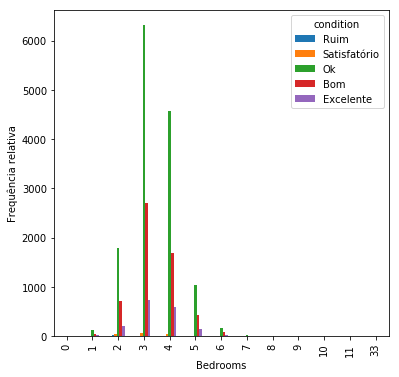

In [28]:
ct4.T.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Frequência relativa')
plt.xlabel('Bedrooms')
plt.show()

Embora se tenha um outlier, na classificação de 33 quartos em uma casa considerada excelente, percebe-se que a maioria das casas possuem em média de 3 a 4 quartos.

# Relação entre a Condição da Casa e a quantidade de banheiros


In [ ]:
#crosstab entre a condição da casa e a nota geral
ct5 = pd.crosstab(dados['condition'], dados['bathrooms'])
ct5


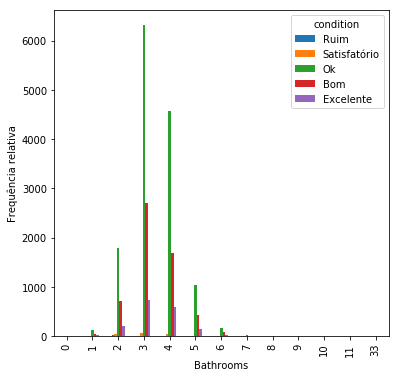

In [29]:
ct4.T.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Frequência relativa')
plt.xlabel('Bathrooms')
plt.show()

Percebe-se que a maioria das casas possuem em média de 3 a 4 banheiros.

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS